# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

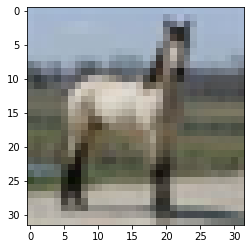

In [2]:
#Sample image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

y = x_train[789]
plt.imshow(y)
plt.show() 

In [3]:
model = Sequential()

#mod 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:])) 
model.add(Activation('relu'))

#mod 2
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#mod 3
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#mod 4
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

#mod 5
model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))

#mod 6
model.add(Dense(num_classes))
model.add(Activation('relu'))

In [4]:
# optimizer
opti = keras.optimizers.RMSprop(learning_rate=0.0001, decay=0.01)
model.compile(loss='categorical_crossentropy', optimizer = opti, metrics=['accuracy'])

In [5]:
#Normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
#train
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 3.8474 - accuracy: 0.2997
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3360 - accuracy: 0.3989
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3386 - accuracy: 0.4212
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3578 - accuracy: 0.4278
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.4394
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.4421
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.4396
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.4438
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.4500
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.4

In [7]:
#test
test = model.evaluate(x_test, y_test)
print('Test accuracy:', test[1])

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.4462
Test accuracy: 0.44620001316070557
